### Análise $k$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.simulation import Simulation
from sklearn.linear_model import LinearRegression

In [2]:
nparticles = 50
radii = np.ones(nparticles)*0.01
styles = {'linewidth': .1, 'fill': None}

In [3]:
probs = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]
k_list = []

for p in probs:
    
    sim = Simulation(nparticles, radii, styles, prob = p)
    k = sim.run(frames=100,display_gif=False,display_fit=False,save_gif=False)
    k_list.append(k)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 165.30it/s]


In [4]:
X, y = np.array(probs[1:]).reshape(-1, 1), np.array(k_list[1:])
# X, y = np.array(probs).reshape(-1, 1), np.array(k_list)

model = LinearRegression()
model.fit(X,y)

slope = model.coef_[0]
intercept = model.intercept_

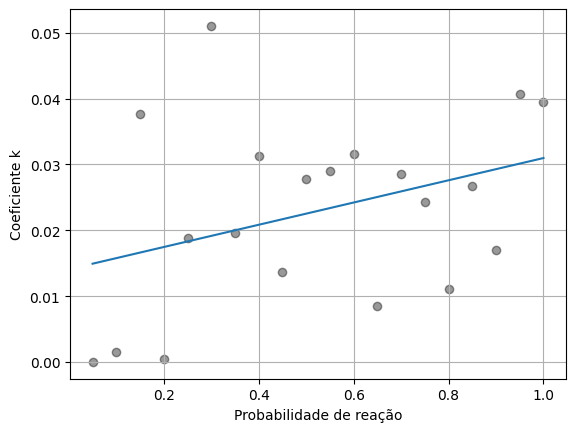

In [5]:
X = np.linspace(X[0],X[-1] )
plt.plot(X, model.predict(X))

plt.scatter(probs[1:],k_list[1:],color='black',alpha=0.4)
plt.xlabel('Probabilidade de reação'),plt.ylabel('Coeficiente k')
plt.grid()